In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lda_train = pd.read_csv('/content/drive/MyDrive/신입프로젝트/train_data_lda.csv')

In [ ]:
corpus = []
stop_w = ['최고','하나','별로','있다', '없다', '진짜','좋다','카페' ,'이다', '좋다','아니다', '좀','같다','금방']

for i in lda_train.preprocessed:
  sub1 = re.sub('라떼|라테|아메리카노', '커피', i)
  sub2 = re.sub('케이크|스콘|마카롱', '디저트', sub1)
  inner = []
  for t in sub2.split(' '):
    if t not in stop_w:
      inner.append(t)
  corpus.append(' '.join(inner))

corpus

['그냥 그렇다 생각 다른 곳 넛 킹 드 이유 그냥 갤러리아 지하 게 갑자기 확장 이전 웨이 팅 뭐',
 '우유 크림 개 맛있다 혼잡하다 또 곳',
 '도넛 맛있다 종업원 대응 느리다 한남 삼성 점도 여기 손 느리다 듯 직원 많다 왜 느리다 이해 안',
 '도넛 맛 엉 어어 무길 예약 거 절대 못',
 '바닐라 맛 맛있다 도 넛 분 거 이 왕관 김 조각 디저트 사고 살라 다시 줄 못 사서 아쉽다 이 점 개선 꼭 부탁드리다',
 '도넛 맛 맛있다 대신 포장 거 인내심 가야 함 뭔가 포장 방식 거',
 '계산 직원 불친절하다 프로도 두 개시 집 어보 개 안 예정',
 '빵 더 맛있다 저렴하다 데 매장 분위기 직원 끼리 소통 안 느낌 아쉽다 계산 때 빵 디저트 미리 말씀',
 '안 더 거 줄 정리 빨',
 '노 티스 맛있다',
 '아쉽다 처음 노 티스 알 때 설레다 감동 순간 안 입 물 눈 빵 다르다 수 그땐 돈 개 못 지금 살 수 감동 맛 몇 번 혹시 혹시 대감 처음 그 맛 수가 또 사',
 '느끼하다 막 달리 난 맛있다 뎅 개취 듯 커피 무난 함',
 '당 때 꼭',
 '줄 길다 맛',
 '낮 사서 바로 때 맛 저녁 빵 딱딱하다 감흥 카야 버터 벼로 디다',
 '맛있다 줄 길 어짐 음료 그다지',
 '커스터드 크림 진해 명란 빵 빵 자체 맛있다',
 '맛있다 던킨 도넛 그 말',
 '더 맛있다 던킨 도넛 이즈 버터 도넛 밍밍 데 묘 맛 남 스마일 디저트 촉촉 부드럽다 맛 남 토요일 시 기준 분 상 대기',
 '맛있다 단 건 담 사람 조오오 많다',
 '우유 생크림 인테리어 이사 고 나선 감성 조금 좌석 굿',
 '궁금하다 번 볼 만',
 '스마일 스티커 움 도넛 시장 꽈배기 맛',
 '친구 존 맛 맛있다',
 '천 원 더 싱글 오리진 어떻다 이렇다 커피 주인 알바 분 수도 도넛 사악하다 가격 생각 기대 이하 정말 맛없다 기도 힘드다 커피 로 태도 리뷰',
 '정도 서울숲 쪽 도넛 더 맛있다',
 '정도 맛있다 아주',
 '특별하다 게 줄 우유 크림 예술 빵 예술

# LDA 모델링은 여기서부터~ 

In [ ]:
corpus_gen = []
for i in corpus:
  inner = i.split(' ')
  corpus_gen.append(inner)


corpus_gen

In [ ]:
!pip install gensim
from gensim import models
import gensim

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(corpus_gen)
corpus = [dictionary.doc2bow(text) for text in corpus_gen]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(3, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]


In [ ]:
import gensim
NUM_TOPICS = 3 
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=1000)
topics = ldamodel.print_topics(num_words=15)
for topic in topics:
    print(topic)

In [ ]:
print(ldamodel.print_topics())

[(0, '0.080*"좋다" + 0.035*"커피" + 0.034*"분위기" + 0.029*"있다" + 0.025*"카페" + 0.025*"맛있다" + 0.020*"맛" + 0.018*"친절하다" + 0.015*"곳" + 0.013*"많다"'), (1, '0.057*"맛있다" + 0.047*"맛" + 0.033*"커피" + 0.021*"케이크" + 0.019*"라테" + 0.011*"티" + 0.010*"진짜" + 0.009*"집" + 0.008*"밀크" + 0.008*"최고"'), (2, '0.027*"안" + 0.020*"없다" + 0.016*"있다" + 0.015*"직원" + 0.012*"거" + 0.011*"맛" + 0.011*"것" + 0.011*"아니다" + 0.010*"그냥" + 0.010*"같다"'), (3, '0.030*"있다" + 0.018*"치즈" + 0.016*"샐러드" + 0.014*"곳" + 0.013*"리" + 0.010*"코타" + 0.010*"수" + 0.010*"사람" + 0.010*"많다" + 0.009*"맛"')]


# Coherence 시각화 코드

In [ ]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline

coherence_values=[]
for i in range(2,15):
  ldamodel = gensim.models.LdaModel(corpus, num_topics = i, id2word=dictionary)
  coherence_model_lda = CoherenceModel(model=ldamodel, texts=high_score_reviews, dictionary=dictionary, topn=10)
  coherence_lda = coherence_model_lda.get_coherence()
  coherence_values.append(coherence_lda)


In [ ]:
for i in range(len(coherence_values)):
  print(coherence_values[i])

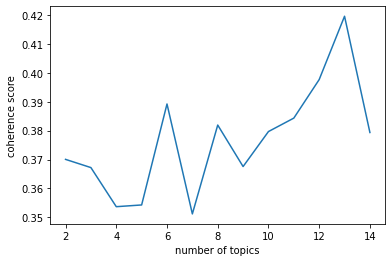

In [ ]:
x=range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus_, dictionary)
pyLDAvis.display(vis)